<a href="https://colab.research.google.com/github/GoldKodo/Data/blob/main/12%EC%A3%BC%EC%B0%A8_%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글 세팅

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#실행후 세션다시시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,691 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121926 files and dire

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://media.naver.com/press/437/ranking?type=popular&date=20240711'  #주소적기
webpage = requests.get(url).text
webpage

'<!doctype html>\n<html lang="ko">\n\t<head>\n\t\t<title id="browserTitleArea">\n\n\nJTBC :: 네이버뉴스\n</title>\n\t\t\n\n\n<script>\n\tfunction isMobileDevice() {\n\t\treturn /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);\n\t}\n</script>\n<script>\n\t(function () {\n\t\ttry {\n\t\t\tif (isMobileDevice() && isAbleApplyPrefersColorScheme()) {\n\t\t\t\t\n\t\t\t\tdocument.querySelector("html").classList.add("DARK_THEME");\n\t\t\t}\n\t\t} catch(e) {}\n\n\t\tfunction isAbleApplyPrefersColorScheme() {\n\t\t\t\n\t\t\tif (window.matchMedia("(prefers-color-scheme)").matches === false) {\n\t\t\t\treturn false;\n\t\t\t}\n\n\t\t\tvar userAgent = navigator.userAgent;\n\n\t\t\tif (userAgent.indexOf("NAVER") > -1) {\n\t\t\t\t\n\t\t\t\tif (/.*NAVER\\([a-zA-Z]*;\\s[a-zA-Z]*;\\s([0-9]*);/.test(userAgent)) {\n\t\t\t\t\treturn Number(RegExp.$1) >= 1000;\n\t\t\t\t}\n\t\t\t} else {\n\t\t\t\t\n\t\t\t\treturn document.cookie.indexOf("NSCS=1") > -1;\n\t\t\t}\n\n\t\t\treturn false;\n\t\t}\n\t})();\n</

In [3]:
# BeautifulSoup 객체 생성 : html 문서형식으로 문자열 저장 (위의 더러운 출력을 정리)
soup = BeautifulSoup(webpage, 'html.parser')  #파서형식 적기
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<title id="browserTitleArea">


JTBC :: 네이버뉴스
</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_press' || null;
		</script>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0

In [4]:
# 리스트 파일
soup.select('li.as_thumb') #섬네일에 해당하는 부분을 다 긁어옴

[<li class="as_thumb">
 <a class="_es_pc_link" data-pc-link="" href="https://n.news.naver.com/article/437/0000401078?ntype=RANKING" onclick="nclk(event, 'rnk.rnknws','','')">
 <em class="list_ranking_num">1</em>
 <div class="list_content">
 <strong class="list_title">다리 붕괴 사진에 2시간 통제…"손 떨림으로 왜곡, 죄송합니다"</strong>
 <span class="list_view">
 <span class="blind">조회수</span>
                                                     27,817
                                                 
                                             
                                             
                                         
                                     </span>
 </div>
 <div class="list_img">
 <img height="100%" onerror="showNoImage(this)" src="https://mimgnews.pstatic.net/image/origin/437/2024/07/11/401078.jpg?type=nf148_148" width="100%"/>
 </div>
 </a>
 </li>,
 <li class="as_thumb">
 <a class="_es_pc_link" data-pc-link="" href="https://n.news.naver.com/article/437/0000401035?ntype=RANKING" on

In [30]:
#Q 딕셔너리 형태로 저장 후, 데이터프레임 생성  #순위, 제목, 조회수 읽어오기
data = []
for item in soup.select('li.as_thumb') :
    rank = item.select_one('em.list_ranking_num').text #.select_one = 조건에 맞는 CSS 선택자 1개 찾음
    title = item.select_one('strong.list_title').text
    view = item.select_one('span.list_view').text
    data.append({'Rank': rank, 'Title': title, 'View': view})

df = pd.DataFrame(data)
df

,Rank,Title,View
0,1,"다리 붕괴 사진에 2시간 통제…""손 떨림으로 왜곡, 죄송합니다""",\n조회수\n ...
1,2,"""감독 중 최악"" ""나가!!"" 홈팬 야유 지켜본 홍명보 [소셜픽]",\n조회수\n ...
2,3,"쯔양 ""4년간 맞아"" 충격 고백…'렉카' 유튜버 갈취 협박까지 [소셜픽]",\n조회수\n ...
3,4,"[단독] 김경율 ""금감원장 검토된 건 맞다. 한동훈 아닌 대통령실이 한 것""",\n조회수\n ...
4,5,"미국 명문대 한인 학생, 강변서 숨진 채 발견…""사인 조사 중""",\n조회수\n ...
5,6,"""상황 보니..김여사에 배신감"" 진중권 직접 밝힌 '막전막후'",\n조회수\n ...
6,7,'윤대통령 탄핵 추진 반대' 청원 5만 돌파…국회 법사위 회부,\n조회수\n ...
7,8,"'광화문광장 태극기' 계획 철회…오세훈 ""모든 가능성 열고 재검토""",\n조회수\n ...
8,9,"황우여 ""대통령 탄핵청문회 법사위 의결 위헌…본회의 거쳐야 발동""",\n조회수\n ...
9,10,"우크라에 F-16 80대 간다…나토 ""러·북·중에 뒤처질 수 없어""",\n조회수\n ...


In [26]:
df['View'][0]

'\n조회수\n                                                    27,817\n                                                \n                                            \n                                            \n                                        \n                                    '

Q
\n조회수\n 제거

'\n' 제거

, 저거 (콤마)

In [37]:
df['View'] = df['View'].str.replace('\n조회수\n','').str.replace('\n','').str.replace(',','').str.strip() # 여러개 쓰지말고 이렇게 이어붙이는게 좋음. (마지막 strip은 공백 지우기)
df['View'][:5]
df.info() #확인했을때 View가 object임(문자열임)
df['View'] = df['View'].astype('int') # 숫자열로 바꿔줌
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    20 non-null     object
 1   Title   20 non-null     object
 2   View    20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    20 non-null     object
 1   Title   20 non-null     object
 2   View    20 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


언론사별 주소 확인하기

https://media.naver.com/press/

https://media.naver.com/press/015/ranking


In [ ]:
#pressDt = {'MBC': '214', '연합뉴스': '422', 'KBS': '056', 'JTBC': '437'}
#newdf = pd.

# 함수를 작성하여 각 언론사별 뉴스 기사 스크래핑

In [38]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def getDataNews(press, code) :
    url = f'https://media.naver.com/press/{code}/ranking?/type=popular' # 자동으로 작성된 코드 실행, 파라미터로 전송

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    data = []
    for item in soup.select('li.as_thumb') :
        rank = item.select_one('em.list_ranking_num').text
        title = item.select_one('strong.list_title').text
        views = item.select_one('span.list_view').text
        data.append({'순위': rank, '기사제목': title, '조회수': views})

    df = pd.DataFrame(data)
    df['조회수'] = df['조회수'].str.replace('\n조회수\n','').str.replace('\n','').str.replace(',','').str.strip()
    df['언론사'] = press
    return df

In [40]:
getDataNews('MBC', '214')

,순위,기사제목,조회수,언론사
0,1,"""쯔양 협박"" 폭로에 유튜브 발칵‥""맞으며 4년 방송‥돈도 뺏겨""",16336,MBC
1,2,전북 익산에 MT 왔던 대학생 실종‥경찰 이틀째 수색 중,12204,MBC
2,3,"윤석열 탄핵 반대 청원도 5만 명 돌파‥정청래 ""8월 중 청문회 열자""",11096,MBC
3,4,"나경원, 한동훈 '당무 개입' 발언에 ""대통령 탄핵에 밑밥 던져줘""",9383,MBC
4,5,"이재명 연임 반대 51%, 찬성 35%‥윤대통령 지지율 26% 답보",8408,MBC
5,6,"""검사님도 스토커"" ""사형해야"" 유족은 오열‥누구 재판이길래",5330,MBC
6,7,연예인 이름 열거하며‥좌파·우파 가른 이진숙,4786,MBC
7,8,"윤 대통령 ""극한호우 피해 안타까워‥비상대응태세 정비""",4457,MBC
8,9,새벽 시간 시속 150km 넘는 폭주 끝에 60대 신호수 숨지게 한 20대 구속 송치,3638,MBC
9,10,'사면초가' 바이든‥펠로시·클루니까지 사퇴 압박,3077,MBC


In [41]:
pressDt = {'MBC': '214', '연합뉴스': '422', 'KBS': '056', 'JTBC': '437'}
newdf = pd.DataFrame()
for k, v in pressDt.items() :
    newdf = pd.concat([newdf, getDataNews(k, v)])
newdf

,순위,기사제목,조회수,언론사
0,1,"""쯔양 협박"" 폭로에 유튜브 발칵‥""맞으며 4년 방송‥돈도 뺏겨""",16336,MBC
1,2,전북 익산에 MT 왔던 대학생 실종‥경찰 이틀째 수색 중,12204,MBC
2,3,"윤석열 탄핵 반대 청원도 5만 명 돌파‥정청래 ""8월 중 청문회 열자""",11096,MBC
3,4,"나경원, 한동훈 '당무 개입' 발언에 ""대통령 탄핵에 밑밥 던져줘""",9383,MBC
4,5,"이재명 연임 반대 51%, 찬성 35%‥윤대통령 지지율 26% 답보",8408,MBC
...,...,...,...,...
15,16,이미 '별 4개짜리 장군' 만들기…검찰도 김여사-이씨 관계 물었다,665,JTBC
16,17,"""대통령의 뜻"" 취임하자마자 사퇴 압박 받은 한동훈…이유가",627,JTBC
17,18,[사반 제보] '달다 달아'...지하철서 '참외' 깎아 먹은 승객,595,JTBC
18,19,"'강남 납치살해' 주범 북파공작원 출신 이경우, 황대한 무기징역",565,JTBC


In [42]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      80 non-null     object
 1   기사제목    80 non-null     object
 2   조회수     80 non-null     object
 3   언론사     80 non-null     object
dtypes: object(4)
memory usage: 3.1+ KB


#Q 조회수 타입 숫자로 변경

In [43]:
# 데이터 타입 변경
newdf['조회수'] = newdf['조회수'].astype(int)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      80 non-null     object
 1   기사제목    80 non-null     object
 2   조회수     80 non-null     int64 
 3   언론사     80 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.1+ KB


#Q 조회수가 많은 상위 10개 기사

In [45]:
#조회수가 많은 상위 10개 기사

newdf10 = newdf.sort_values('조회수', ascending=False).head(10)
newdf10

,순위,기사제목,조회수,언론사
0,1,"다리 붕괴 사진에 2시간 통제…""손 떨림으로 왜곡, 죄송합니다""",27251,JTBC
0,1,엄마는 출국·아빠는 연락두절…3살 아이는 어디로?,16503,KBS
0,1,"""쯔양 협박"" 폭로에 유튜브 발칵‥""맞으며 4년 방송‥돈도 뺏겨""",16336,MBC
1,2,"""감독 중 최악"" ""나가!!"" 홈팬 야유 지켜본 홍명보 [소셜픽]",14742,JTBC
2,3,"""상황 보니..김여사에 배신감"" 진중권 직접 밝힌 '막전막후'",14108,JTBC
3,4,"미국 명문대 한인 학생, 강변서 숨진 채 발견…""사인 조사 중""",13599,JTBC
1,2,전북 익산에 MT 왔던 대학생 실종‥경찰 이틀째 수색 중,12204,MBC
2,3,"윤석열 탄핵 반대 청원도 5만 명 돌파‥정청래 ""8월 중 청문회 열자""",11096,MBC
4,5,"쯔양 ""4년간 맞아"" 충격 고백…'렉카' 유튜버 갈취 협박까지 [소셜픽]",10838,JTBC
1,2,역대급 물난리 난 날에…대구시는 물놀이장 개장,10358,KBS


In [46]:
# 조회수가 많은 상위 10개 기사 언론사
newdf10.value_counts('언론사')

언론사
JTBC    5
MBC     3
KBS     2
Name: count, dtype: int64

In [47]:
df.columns

Index(['Rank', 'Title', 'View'], dtype='object')

#Q 상위 10개 기사제목별, 조회수 막대그래프

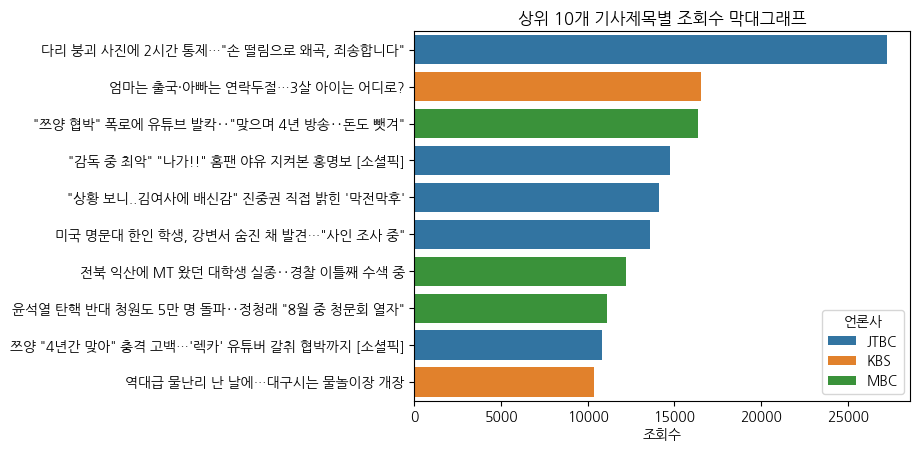

In [52]:
# 그래프 그리기
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot( x = '조회수', y = '기사제목', data = newdf10, hue = '언론사')
#
plt.title('상위 10개 기사제목별 조회수 막대그래프')
plt.xlabel('조회수')
plt.ylabel('')
plt.show()

In [ ]:
# Quiz : 상기 도표 한글 깨짐 현상을 바로 잡는 코딩을 완성하라

#Q 워드클라우드 완성

<function matplotlib.pyplot.show(close=None, block=None)>

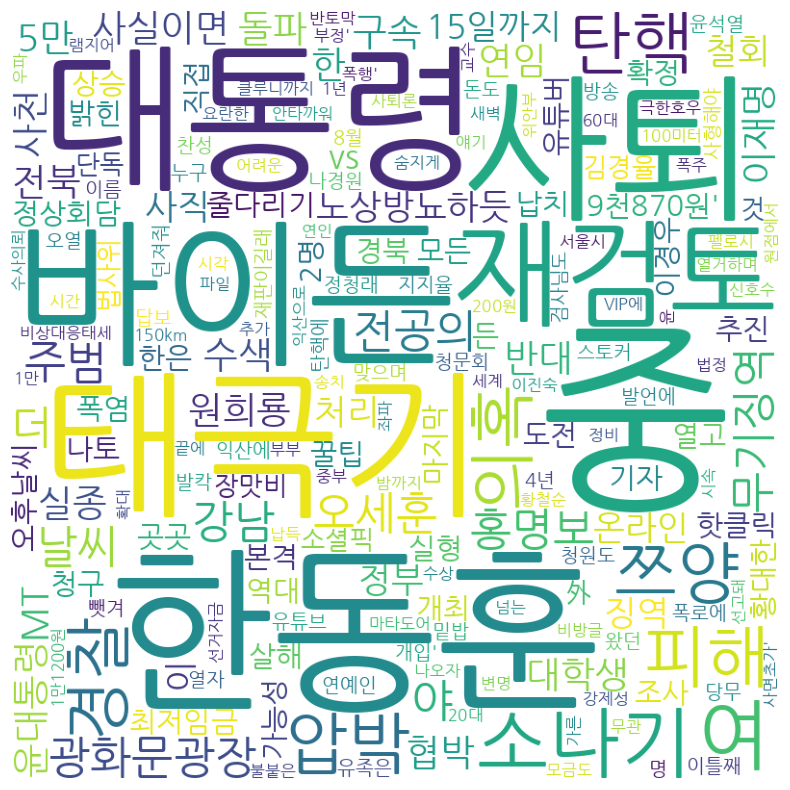

In [66]:
from wordcloud import WordCloud
text = ' '.join(newdf['기사제목'])

#여기에 okt.nouns 등을 사용해서 형태소 분석기로 빈도수 이용해서 워드클라우드 제작 또한 가능.

# 워드클라우드 생성
wolrdcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',width=800,height=800,background_color='white').generate(text) #워드클라우드(워드클라우드에 대한 내용).generate(위의 text)
plt.figure(figsize=(10,10))
plt.imshow(wolrdcloud) #imageshow. 이미지 보여주는 명령어
plt.axis('off') #axis = 축 설정 명령어. off면 지우는거
plt.show